In [27]:
import pandas as pd
features = pd.read_csv("trainsample_SEG5_V1.csv")
features_gb = pd.read_csv("trainsample_SEG5_V1.csv")
features.head(5)

,event,event1,MOB(yrs),age,TOP_PERSO,TOP_IMMO,TOP_CAV,TOP_GSM,TOP_ASSV,TOP_CB_VISA,...,MONS_INLIM_CARS,MONS_INLIM_DAV,MONS_INLIM_PORT,MONS_INLIM_NB_PROD,MONS_INLIM_CRFLOW,MONS_INLIM_DRFLOW,MONS_INLIM_PROCL,MONS_INLIM_SERCL,Change_cr,Change_db
0,0,NON_EVENT,13,63,0,0,1,0,1,0,...,0,0,0,12,7,12,12,12,-100.000000,50.802139
1,0,NON_EVENT,2,36,0,0,1,0,1,1,...,12,11,0,12,11,11,12,12,21.568627,-15.175097
2,0,NON_EVENT,19,49,0,0,1,0,1,1,...,12,12,0,12,12,12,12,12,6.666667,-8.387097
3,0,NON_EVENT,2,57,0,0,1,0,0,1,...,12,12,0,12,12,11,12,12,-60.000000,-10.576923
4,0,NON_EVENT,16,59,0,0,1,0,0,1,...,0,12,0,11,12,11,2,12,0.000000,-66.233766


In [14]:
print('The shape of our features is:', features.shape)

The shape of our features is: (18898, 71)


In [15]:
features.describe()

,event,MOB(yrs),age,TOP_PERSO,TOP_IMMO,TOP_CAV,TOP_GSM,TOP_ASSV,TOP_CB_VISA,TOP_CB_BUSI,...,MONS_INLIM_CARS,MONS_INLIM_DAV,MONS_INLIM_PORT,MONS_INLIM_NB_PROD,MONS_INLIM_CRFLOW,MONS_INLIM_DRFLOW,MONS_INLIM_PROCL,MONS_INLIM_SERCL,Change_cr,Change_db
count,18898.00000,18898.000000,18898.000000,18898.000000,18898.000000,18898.00000,18898.000000,18898.000000,18898.000000,18898.000000,...,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000,18898.000000
mean,0.06334,10.525188,39.922214,0.091438,0.017303,0.99910,0.000529,0.275320,0.659170,0.042015,...,5.742142,9.572124,1.304265,7.490528,10.567415,10.540586,6.295904,10.710393,-5.712331,-8.583344
std,0.24358,5.771598,17.665819,0.288239,0.130403,0.02998,0.022998,0.446687,0.474001,0.200629,...,5.031133,3.192789,3.542726,4.829850,2.082805,2.090904,5.065906,3.393275,87.494017,201.427554
min,0.00000,1.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6700.000000,-18100.000000
25%,0.00000,6.000000,25.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,2.000000,10.000000,10.000000,0.000000,12.000000,-25.000000,-15.858300
50%,0.00000,11.000000,40.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,...,5.000000,11.000000,0.000000,10.000000,11.000000,11.000000,7.000000,12.000000,3.448276,0.000000
75%,0.00000,16.000000,55.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,...,12.000000,12.000000,0.000000,12.000000,12.000000,12.000000,12.000000,12.000000,27.768817,16.129032
max,1.00000,20.000000,70.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,100.000000,100.000000


In [16]:
import numpy as np

labels = np.array(features['event'])

# Remove the labels from the features , axis 1 refers to the columns
features= features.drop(['event', 'event1'], axis = 1)
#features= features.drop(['BAD'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

features = np.array(features)


# In[45]:


from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [17]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (15118, 69)
Training Labels Shape: (15118,)
Testing Features Shape: (3780, 69)
Testing Labels Shape: (3780,)


In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
lr.fit(train_features, train_labels)
#print(lr.coef_)
#print(lr.intercept_)

y_pred=lr.predict(test_features)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(test_labels,y_pred))
print("Accuracy:",accuracy_score(test_labels,y_pred))

C:\Users\G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[3528   17]
 [ 211   24]]
Accuracy: 0.9396825396825397


In [19]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
### Random Forest ###

from sklearn.ensemble import RandomForestRegressor

# n_estimators = number of trees in the foreset -> more trees less variance but high computation
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree -> less depth more bias
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node -> less means less bias more variance
# bootstrap = method for sampling data points (with or without replacement)

rf = RandomForestRegressor(n_estimators=1000, random_state=42,max_features='sqrt')
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

In [21]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_labels,predictions.round()))
print(classification_report(test_labels,predictions.round()))
print(accuracy_score(test_labels, predictions.round()))

[[3515   30]
 [  81  154]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3545
           1       0.84      0.66      0.74       235

    accuracy                           0.97      3780
   macro avg       0.91      0.82      0.86      3780
weighted avg       0.97      0.97      0.97      3780

0.9706349206349206


In [23]:
### Random Forest ###

from sklearn.ensemble import RandomForestRegressor

# n_estimators = number of trees in the foreset -> more trees less variance but high computation
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree -> less depth more bias
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node -> less means less bias more variance
# bootstrap = method for sampling data points (with or without replacement)

rf2 = RandomForestRegressor(n_estimators=1000, random_state=42,max_features='log2')
rf2.fit(train_features, train_labels)
predictions = rf2.predict(test_features)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_labels,predictions.round()))
print(classification_report(test_labels,predictions.round()))
print(accuracy_score(test_labels, predictions.round()))

[[3516   29]
 [  93  142]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3545
           1       0.83      0.60      0.70       235

    accuracy                           0.97      3780
   macro avg       0.90      0.80      0.84      3780
weighted avg       0.97      0.97      0.97      3780

0.9677248677248678


In [24]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Ratio_crdt_trnovr_0_6mois Importance: 0.08
Variable: Ratio_dbt_bal_0_12mois Importance: 0.08
Variable: top_clot_cav12       Importance: 0.07
Variable: Ratio_dbt_bal_0_6mois Importance: 0.07
Variable: Ratio_dbt_trnovr_0_12mois Importance: 0.05
Variable: Ratio_dbt_trnovr_0_6mois Importance: 0.04
Variable: change_nb_prod       Importance: 0.04
Variable: Avg_Crdt_trnovr_6mois Importance: 0.03
Variable: Ratio_crdt_trnovr_6_12mois Importance: 0.03
Variable: Ratio_dbt_bal_6_12mois Importance: 0.03
Variable: MONS_INLIM_NB_PROD   Importance: 0.03
Variable: MONS_INLIM_SERCL     Importance: 0.03
Variable: Avg_Dbt_Bal_6mois    Importance: 0.02
Variable: Avg_Dbt_Bal_12mois   Importance: 0.02
Variable: Avg_Crdt_trnovr_12mois Importance: 0.02
Variable: Avg_Dbt_trnovr_6mois Importance: 0.02
Variable: Avg_Dbt_trnovr_12mois Importance: 0.02
Variable: Avg_Savngs_Bal_12mois Importance: 0.02
Variable: Ratio_dbt_trnovr_6_12mois Importance: 0.02
Variable: Ratio_Savngs_bal_0_6mois Importance: 0.02
V

In [25]:
feature_list


['MOB(yrs)',
 'age',
 'TOP_PERSO',
 'TOP_IMMO',
 'TOP_CAV',
 'TOP_GSM',
 'TOP_ASSV',
 'TOP_CB_VISA',
 'TOP_CB_BUSI',
 'TOP_CB_PREMIER',
 'TOP_CB_INFI',
 'TOP_CB_MASTER',
 'TOP_CONV_M_1',
 'top_clot_cav12',
 'top_clot_pea12',
 'top_clot_IMMO12',
 'top_clot_PERSO12',
 'top_staff',
 'TOP_PEA',
 'TOP_TITRE',
 'TOP_INV',
 'top_cars',
 'top_carte',
 'TOP_PAssport',
 'Contact_3mois',
 'Contact_6mois',
 'Contact_9mois',
 'Contact_12mois',
 'Avg_Dbt_Bal_6mois',
 'Avg_Dbt_Bal_12mois',
 'Avg_Crdt_trnovr_6mois',
 'Avg_Crdt_trnovr_12mois',
 'Avg_Dbt_trnovr_6mois',
 'Avg_Dbt_trnovr_12mois',
 'Avg_Savngs_Bal_6mois',
 'Avg_Savngs_Bal_12mois',
 'Ratio_crdt_trnovr_0_6mois',
 'Ratio_crdt_trnovr_6_12mois',
 'Ratio_dbt_trnovr_0_6mois',
 'Ratio_dbt_trnovr_0_12mois',
 'Ratio_dbt_trnovr_6_12mois',
 'Ratio_dbt_bal_0_6mois',
 'Ratio_dbt_bal_0_12mois',
 'Ratio_dbt_bal_6_12mois',
 'Ratio_Savngs_bal_0_6mois',
 'Ratio_Savngs_bal_0_12mois',
 'Ratio_Savngs_bal_6_12mois',
 'Avg_Wealth_Bal_6mois',
 'Avg_Wealth_Bal_12mo

In [28]:
features_new = features.drop(["event", "event1", "TOP_PERSO",
 "TOP_IMMO", "TOP_CAV", "TOP_GSM"              
 ,"TOP_ASSV"             
,"TOP_CB_VISA"          
,"TOP_CB_BUSI"          
,"TOP_CB_PREMIER"       
 ,"TOP_CB_INFI"          
 ,"TOP_CB_MASTER"        
, "TOP_CONV_M_1"         
, "top_clot_pea12"       
 ,"top_clot_IMMO12"      
 ,"top_clot_PERSO12"     
, "top_staff"            
, "TOP_PEA"             
, "TOP_TITRE"            
, "TOP_INV"             
, "top_cars"             
, "top_carte"          
, "TOP_PAssport"         
, "Contact_3mois"      
 ,"Contact_6mois"        
, "Contact_9mois"        
, "Contact_12mois"      
 ,"Avg_Wealth_Bal_6mois"
, "Avg_Wealth_Bal_12mois" 
 ,"NB_PE_ME"             
 ,"mt_dbloc_cons_rep"    
, "mt_capir_cons_rep"    
, "mt_dbloc_immo_rep"    
, "mt_capir_immo_rep"    
 ,"MONS_INLIM_ASV", "MONS_INLIM_PORT"], axis = 1)

In [29]:
train_features_new, test_features_new, train_labels_new, test_labels_new = train_test_split(features_new, labels, test_size = 0.2, random_state = 42)

In [30]:
### Random Forest ###

from sklearn.ensemble import RandomForestRegressor

# n_estimators = number of trees in the foreset -> more trees less variance but high computation
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree -> less depth more bias
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node -> less means less bias more variance
# bootstrap = method for sampling data points (with or without replacement)

rf3 = RandomForestRegressor(n_estimators=1000, random_state=42,max_features='sqrt')
rf3.fit(train_features_new, train_labels_new)
predictions_new = rf3.predict(test_features_new)
print(confusion_matrix(test_labels_new,predictions_new.round()))
print(classification_report(test_labels_new,predictions_new.round()))
print(accuracy_score(test_labels_new, predictions_new.round()))

[[3515   30]
 [  73  162]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3545
           1       0.84      0.69      0.76       235

    accuracy                           0.97      3780
   macro avg       0.91      0.84      0.87      3780
weighted avg       0.97      0.97      0.97      3780

0.9727513227513227


In [31]:
########### GBM #######

target = 'event'
features_gb= features_gb.drop(["event1"], axis =1)

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics

# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree -> less depth more bias
# min_samples_leaf = min number of data points allowed in a leaf node -> less means less bias more variance
#learning_rate = The learning parameter controls the magnitude of this change in the estimates -> lower implies less variance and high computation (no of trees to converge increases)
#n_estimators = The number of sequential trees to be modeled -> more tress more robust model using a perfect learning rate

In [32]:
features_gb.head()

,event,MOB(yrs),age,TOP_PERSO,TOP_IMMO,TOP_CAV,TOP_GSM,TOP_ASSV,TOP_CB_VISA,TOP_CB_BUSI,...,MONS_INLIM_CARS,MONS_INLIM_DAV,MONS_INLIM_PORT,MONS_INLIM_NB_PROD,MONS_INLIM_CRFLOW,MONS_INLIM_DRFLOW,MONS_INLIM_PROCL,MONS_INLIM_SERCL,Change_cr,Change_db
0,0,13,63,0,0,1,0,1,0,0,...,0,0,0,12,7,12,12,12,-100.000000,50.802139
1,0,2,36,0,0,1,0,1,1,0,...,12,11,0,12,11,11,12,12,21.568627,-15.175097
2,0,19,49,0,0,1,0,1,1,0,...,12,12,0,12,12,12,12,12,6.666667,-8.387097
3,0,2,57,0,0,1,0,0,1,0,...,12,12,0,12,12,11,12,12,-60.000000,-10.576923
4,0,16,59,0,0,1,0,0,1,0,...,0,12,0,11,12,11,2,12,0.000000,-66.233766


In [33]:

def modelfit(alg, data,predictors, performCV=False, printFeatureImportance=True):

    train,test= train_test_split(data, test_size=0.2, random_state=42)
    dtrain=train
    dtest=test
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['event'])


    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Predict test set:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]

    #Perform cross-validation:
    #if performCV:
    #    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['event'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['event'], dtrain_predprob))

    print ("\nModel Report Test")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtest['event'].values, dtest_predictions))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(dtest['event'], dtest_predprob))
    
    #if performCV:
    #    print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        return(feat_imp)


In [34]:
#Choose all predictors except target & IDcols
predictors = [x for x in features_gb.columns if x not in [target]]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=100,max_depth=9, min_samples_split=1200, min_samples_leaf=60, random_state=42, max_features=7,
warm_start=True)
modelfit(gbm_tuned_4, features_gb, predictors, performCV=False)


Model Report
Accuracy : 0.9364
AUC Score (Train): 0.973177

Model Report Test
Accuracy : 0.9378
AUC Score (Test): 0.970488


Ratio_dbt_bal_0_12mois        1.888718e-01
Ratio_crdt_trnovr_0_6mois     1.441962e-01
Ratio_dbt_bal_0_6mois         1.409134e-01
Ratio_dbt_trnovr_0_12mois     9.441394e-02
top_clot_cav12                6.888001e-02
Ratio_dbt_trnovr_0_6mois      5.443875e-02
Ratio_dbt_bal_6_12mois        4.131141e-02
Avg_Crdt_trnovr_6mois         3.772024e-02
Ratio_crdt_trnovr_6_12mois    3.523364e-02
MONS_INLIM_SERCL              3.049663e-02
MONS_INLIM_NB_PROD            2.961352e-02
change_nb_prod                2.497259e-02
Ratio_dbt_trnovr_6_12mois     2.191506e-02
Ratio_Savngs_bal_0_12mois     1.491395e-02
Avg_Dbt_trnovr_6mois          1.369598e-02
Ratio_Savngs_bal_0_6mois      1.248406e-02
Ratio_Savngs_bal_6_12mois     8.523248e-03
Avg_Dbt_Bal_6mois             7.799634e-03
MONS_INLIM_CRFLOW             4.115993e-03
mt_capir_immo_rep             3.733834e-03
Change_db                     3.463502e-03
mt_dbloc_immo_rep             2.849104e-03
Avg_Crdt_trnovr_12mois        2.058090e-03
Avg_Savngs_

In [35]:
###### XG Boost ######

target = 'event'
features_xgb= features_gb

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


# Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
# Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
# Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
# Lower the learning rate and decide the optimal parameters .


# In[112]:




def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50, printFeatureImportance=True):
    
    train,test= train_test_split(features_xgb, test_size=0.2, random_state=42)
    dtrain=train
    dtest=test

    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['event'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['event'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Predict test set:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]

        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['event'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['event'], dtrain_predprob))
    
    print ("\nModel Report Test")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtest['event'].values, dtest_predictions))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(dtest['event'], dtest_predprob))

#     if printFeatureImportance:
#         feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#         return(feat_imp)


In [36]:
#Choose all predictors except target & IDcols
predictors = [x for x in features_xgb.columns if x not in [target]]
xgb1 = XGBClassifier(
 learning_rate =0.005,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)

modelfit(xgb1, features_xgb, predictors)




Model Report
Accuracy : 0.9724
AUC Score (Train): 0.981456

Model Report Test
Accuracy : 0.9672
AUC Score (Test): 0.976455


In [37]:
#### ANN ####

# Import required libraries
import pandas as pd
import numpy as np 

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = features_gb 
print(df.shape)
df.describe().transpose()
target_column = ['event']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()


X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='relu', solver='adam', max_iter=1000,learning_rate_init=0.01)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print(accuracy_score(y_test, predict_test))

(18898, 70)
(13228, 69)
(5670, 69)


C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5235   90]
 [ 137  208]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5325
           1       0.70      0.60      0.65       345

    accuracy                           0.96      5670
   macro avg       0.84      0.79      0.81      5670
weighted avg       0.96      0.96      0.96      5670

0.9599647266313933


In [38]:
#### ANN ####

# Import required libraries
import pandas as pd
import numpy as np 

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = features_gb 
print(df.shape)
df.describe().transpose()
target_column = ['event']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()


X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='logistic', solver='adam', max_iter=1000,learning_rate_init=0.01)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print(accuracy_score(y_test, predict_test))

(18898, 70)
(13228, 69)
(5670, 69)


C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5226   99]
 [ 101  244]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5325
           1       0.71      0.71      0.71       345

    accuracy                           0.96      5670
   macro avg       0.85      0.84      0.85      5670
weighted avg       0.96      0.96      0.96      5670

0.9647266313932981


In [39]:
#### ANN ####

# Import required libraries
import pandas as pd
import numpy as np 

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = features_gb 
print(df.shape)
df.describe().transpose()
target_column = ['event']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()


X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='tanh', solver='adam', max_iter=1000,learning_rate_init=0.01)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print(accuracy_score(y_test, predict_test))

(18898, 70)
(13228, 69)
(5670, 69)


C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5237   88]
 [ 127  218]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5325
           1       0.71      0.63      0.67       345

    accuracy                           0.96      5670
   macro avg       0.84      0.81      0.82      5670
weighted avg       0.96      0.96      0.96      5670

0.9620811287477954


In [40]:
#### ANN ####

# Import required libraries
import pandas as pd
import numpy as np 

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = features_gb 
print(df.shape)
df.describe().transpose()
target_column = ['event']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()


X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='identity', solver='adam', max_iter=1000,learning_rate_init=0.01)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print(accuracy_score(y_test, predict_test))

(18898, 70)
(13228, 69)
(5670, 69)


C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5268   57]
 [ 156  189]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5325
           1       0.77      0.55      0.64       345

    accuracy                           0.96      5670
   macro avg       0.87      0.77      0.81      5670
weighted avg       0.96      0.96      0.96      5670

0.9624338624338624


In [41]:
#### ANN ####


#trying for sgd with logistic as it performed best#

# Import required libraries
import pandas as pd
import numpy as np 

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = features_gb 
print(df.shape)
df.describe().transpose()
target_column = ['event']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()


X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='logistic', solver='', max_iter=1000,learning_rate_init=0.01)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print(accuracy_score(y_test, predict_test))

(18898, 70)
(13228, 69)
(5670, 69)


C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5244   81]
 [ 174  171]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5325
           1       0.68      0.50      0.57       345

    accuracy                           0.96      5670
   macro avg       0.82      0.74      0.77      5670
weighted avg       0.95      0.96      0.95      5670

0.955026455026455


In [42]:
#### ANN ####


#trying for sgd with logistic as it performed best#


# Import required libraries
import pandas as pd
import numpy as np 

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = features_gb 
print(df.shape)
df.describe().transpose()
target_column = ['event']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()


X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4), activation='logistic', solver='sgd', max_iter=1000,learning_rate_init=0.01)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print(accuracy_score(y_test, predict_test))

(18898, 70)
(13228, 69)
(5670, 69)


C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5260   65]
 [ 153  192]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5325
           1       0.75      0.56      0.64       345

    accuracy                           0.96      5670
   macro avg       0.86      0.77      0.81      5670
weighted avg       0.96      0.96      0.96      5670

0.9615520282186949


In [48]:
#### ANN ####




# Import required libraries
import pandas as pd
import numpy as np 

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

accuracy = []
neurons = []

for i in range(1,31):
    neurons.append(i)
    df = features_gb 
    #print(df.shape)
    df.describe().transpose()
    target_column = ['event']
    predictors = list(set(list(df.columns))-set(target_column))
    df[predictors] = df[predictors]/df[predictors].max()
    df.describe().transpose()


    X = df[predictors].values
    y = df[target_column].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
    #print(X_train.shape); print(X_test.shape)
    from sklearn.neural_network import MLPClassifier

    mlp = MLPClassifier(hidden_layer_sizes=(i), activation='logistic', solver='sgd', max_iter=1000,learning_rate_init=0.01)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    #from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    #print(confusion_matrix(y_test,predict_test))
    #print(classification_report(y_test,predict_test))
    accuracy.append(accuracy_score(y_test, predict_test))

C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\G\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d arr

Text(0, 0.5, 'accuracy')

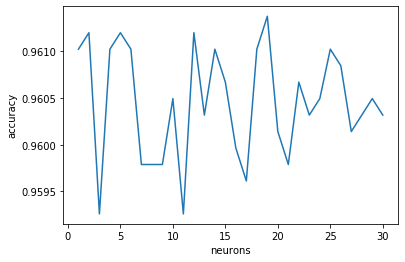

In [51]:
plt.plot(neurons,accuracy)
plt.xlabel('neurons')
plt.ylabel('accuracy')